## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [170]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [172]:
df = pd.read_csv("Travel.csv")
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


## DATA CLEANING 
###  1. Handling Missing values 
#####  2. Handling Duplicates
#####  3. Check data type
#####  4. Understand the dataset 

In [175]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [177]:
#CHECK ALL THE CATEGORIES
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [179]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [181]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [183]:
df["Gender"] = df["Gender"].replace("Fe Male","Female")
df['MaritalStatus'] = df["MaritalStatus"].replace('Single','Unmaried')

In [185]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [187]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Unmaried      916
Unmarried     682
Name: count, dtype: int64

In [189]:
df["MaritalStatus"] = df["MaritalStatus"].replace("Unmaried","Unmarried")

In [191]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [193]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### checking Missing values 
### these are the features with nan value 


In [196]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull()).sum() )

Age 226
TypeofContact 25
DurationOfPitch 251
NumberOfFollowups 45
PreferredPropertyStar 26
NumberOfTrips 140
NumberOfChildrenVisiting 66
MonthlyIncome 233


In [198]:
#statistics on numericals columns
df[features_with_na].select_dtypes(exclude = 'object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


# Imputing Null Values 


In [201]:
# Age
df["Age"].fillna(df["Age"].median(), inplace=True)

# TypeofContract
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0], inplace=True)

# DurationOfPitch 
df["DurationOfPitch"].fillna(df["DurationOfPitch"].median(), inplace=True)

# NumberOfFollowups
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0], inplace=True)

# PreferredPropertyStar 
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0], inplace=True)

# NumberOfTrips
df["NumberOfTrips"].fillna(df["NumberOfTrips"].median(), inplace=True)

# NumberOfChildrenVisiting
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0], inplace=True)

# MonthlyIncome 
df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace=True)


In [203]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [205]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [207]:
df.drop('CustomerID',inplace = True,axis =1)

In [209]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Feature Engineering 
## Feature Extraction 

In [212]:
# creating new column for feature 
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns = ['NumberOfPersonVisiting','NumberOfChildrenVisiting'])

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [214]:
num_features = [feature for feature in df.columns if df[feature].dtype !='O']
print("Num of Numerical features",len(num_features))

Num of Numerical features 14


In [216]:
cat_features = [feature for feature in df.columns if df[feature].dtype =='O']
print("Num of Numerical features",len(cat_features))

Num of Numerical features 6


In [218]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [220]:
#discrete_features
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
len(discrete_features)

11

In [222]:
##continous_features
continous_features = [feature for feature in num_features if feature not in discrete_features]
len(continous_features)

3

# Train_Test Split and Model Training 

In [225]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis = 1 )
y = df['ProdTaken']


In [227]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Unmarried,3.0,1,3,1,2.0,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,3.0,0,5,0,2.0,Executive,20289.0,5.0


In [229]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [231]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [233]:
X_train

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
4128,31.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Basic,5.0,Unmarried,7.0,1,4,0,1.0,Executive,21335.0,4.0
1157,36.0,Company Invited,1,14.0,Salaried,Female,2,3.0,Deluxe,3.0,Married,2.0,0,5,1,1.0,Manager,22347.0,3.0
744,37.0,Self Enquiry,1,13.0,Small Business,Female,3,5.0,Deluxe,4.0,Divorced,6.0,0,4,1,0.0,Manager,19777.0,3.0
4753,43.0,Self Enquiry,3,11.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,2.0,0,5,1,1.0,Manager,23833.0,4.0
2312,28.0,Self Enquiry,1,18.0,Salaried,Female,3,3.0,Basic,3.0,Married,2.0,1,4,1,1.0,Executive,17515.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Unmarried,2.0,0,1,1,2.0,Executive,20723.0,5.0
466,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,4.0
3092,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,5.0
3772,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,5.0


In [235]:
X_test.shape 

(1222, 19)

In [237]:
y_train.shape

(3666,)

In [239]:
cat_features = X.select_dtypes(include = 'object').columns
num_featuress = X.select_dtypes(exclude = 'object').columns

In [241]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [243]:
num_featuress

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

In [245]:
#here in random forest its not necessary but im exploring Columntransformer 
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer =StandardScaler()
ohe_transformer =OneHotEncoder(drop ='first')# one column is not necessary for


In [247]:
prepro = ColumnTransformer(
    [
        ("OneHotEncoder",ohe_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_featuress)
    ]
)

In [249]:
prepro 

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [251]:
## applying transformation on train dataset 
X_train = prepro.fit_transform(X_train)

In [253]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.135533,0.277912,1.777611,2.053422,1.575272,0.681958,-1.273702,-0.212190,-0.415942,-0.058810
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-1.248489,-0.723883,-0.724971,-0.670111,-0.634811,1.409353,0.785113,-0.212190,-0.224146,-0.768009
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.135533,1.279708,0.526320,1.508716,-0.634811,0.681958,0.785113,-1.385473,-0.711215,-0.768009
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.135533,0.277912,1.777611,-0.670111,-0.634811,1.409353,0.785113,-0.212190,0.057482,-0.058810
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.135533,-0.723883,-0.724971,-0.670111,1.575272,0.681958,0.785113,-0.212190,-1.139911,-0.058810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.135533,1.279708,-0.724971,-0.670111,-0.634811,-1.500228,0.785113,0.961094,-0.531928,0.650390
3662,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.135533,-0.723883,1.777611,-1.214818,-0.634811,1.409353,0.785113,-0.212190,1.528543,-0.058810
3663,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.135533,0.277912,-0.724971,2.053422,-0.634811,-0.772833,0.785113,0.961094,-0.356053,0.650390
3664,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.135533,1.279708,-0.724971,-0.125404,-0.634811,-1.500228,0.785113,0.961094,-0.248595,0.650390


In [255]:
## applying transformation on test dataset 
X_test = prepro.transform(X_test)

In [257]:
pd.DataFrame(X_test )

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-1.248489,1.279708,-0.724971,-1.214818,-0.634811,-0.772833,-1.273702,-0.212190,-0.731873,-0.768009
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.135533,0.277912,0.526320,-1.214818,1.575272,1.409353,-1.273702,-0.212190,-0.664972,-0.058810
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.135533,0.277912,-0.724971,0.964009,-0.634811,1.409353,0.785113,-1.385473,-0.416131,-0.768009
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.135533,2.281503,-0.724971,1.508716,-0.634811,-0.045437,0.785113,0.961094,-0.109865,0.650390
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.519555,0.277912,0.526320,-0.125404,1.575272,0.681958,0.785113,2.134377,-0.312653,2.068789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.135533,0.277912,1.777611,-0.125404,1.575272,-0.045437,0.785113,0.961094,2.315245,0.650390
1218,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.248489,-0.723883,-0.724971,0.419302,-0.634811,0.681958,0.785113,-0.212190,1.728488,-0.768009
1219,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.248489,0.277912,-0.724971,-1.214818,-0.634811,-0.772833,0.785113,-0.212190,-0.224146,-0.768009
1220,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.519555,-1.725679,0.526320,-0.125404,-0.634811,-1.500228,0.785113,0.961094,-0.535150,1.359589


In [259]:
!pip install xgboost 

In [260]:
## random forest classifier  training 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_curve,auc


##############################
 Training Adaboost
##############################
--- Adaboost Train Performance ---
Accuracy: 0.8529732678668849
Precision: 0.839794955058401
Recall: 0.8529732678668849
F1 Score: 0.8323367789550956
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      2969
           1       0.73      0.36      0.48       697

    accuracy                           0.85      3666
   macro avg       0.80      0.66      0.70      3666
weighted avg       0.84      0.85      0.83      3666



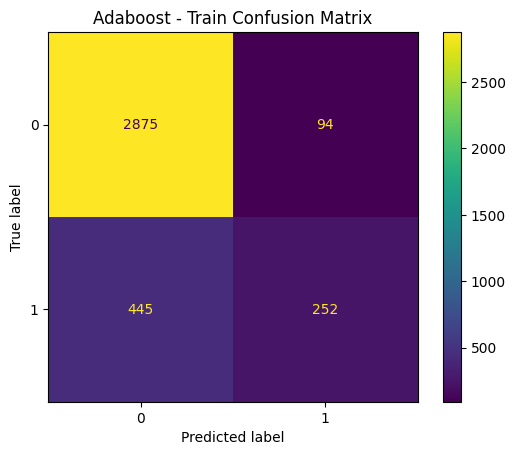

--- Adaboost Test Performance ---
Accuracy: 0.8486088379705401
Precision: 0.8307288347210987
Recall: 0.8486088379705401
F1 Score: 0.8285644312976999
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       999
           1       0.66      0.35      0.45       223

    accuracy                           0.85      1222
   macro avg       0.77      0.65      0.68      1222
weighted avg       0.83      0.85      0.83      1222



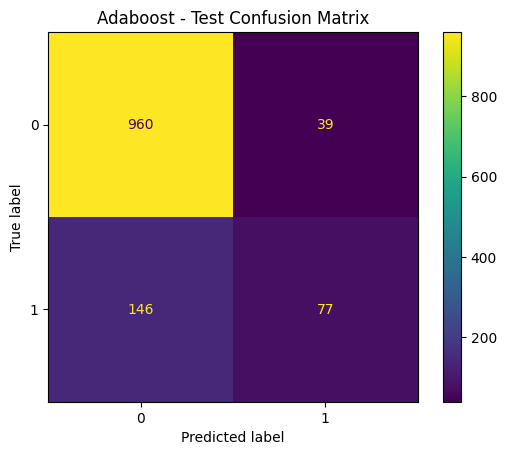

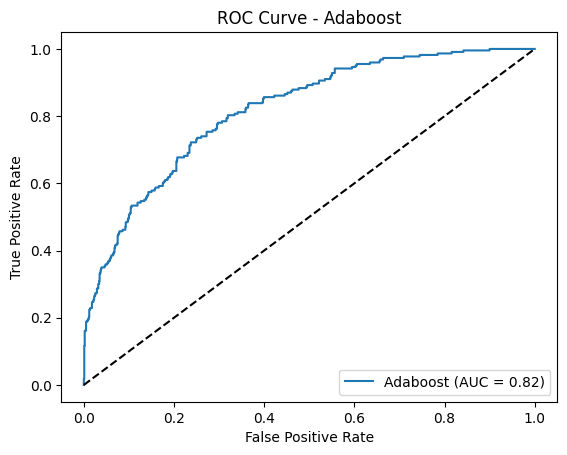


##############################
 Training GradientBoosting
##############################
--- GradientBoosting Train Performance ---
Accuracy: 0.8925259138025096
Precision: 0.8915243393342555
Recall: 0.8925259138025096
F1 Score: 0.8803743187678332
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94      2969
           1       0.88      0.50      0.64       697

    accuracy                           0.89      3666
   macro avg       0.89      0.74      0.79      3666
weighted avg       0.89      0.89      0.88      3666



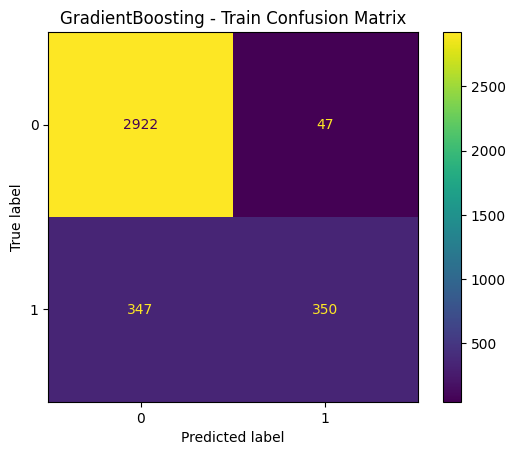

--- GradientBoosting Test Performance ---
Accuracy: 0.8690671031096563
Precision: 0.8597837802187884
Recall: 0.8690671031096563
F1 Score: 0.8515060834083873
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       999
           1       0.77      0.40      0.53       223

    accuracy                           0.87      1222
   macro avg       0.83      0.69      0.73      1222
weighted avg       0.86      0.87      0.85      1222



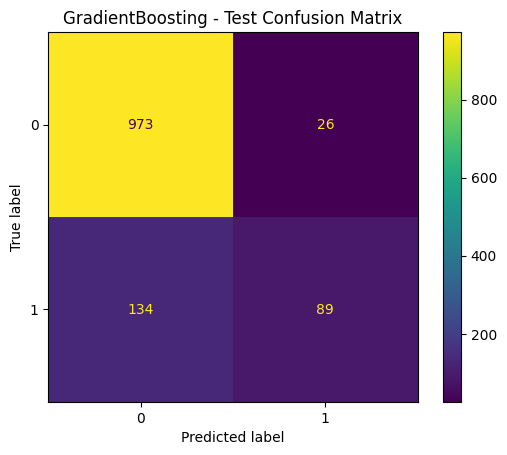

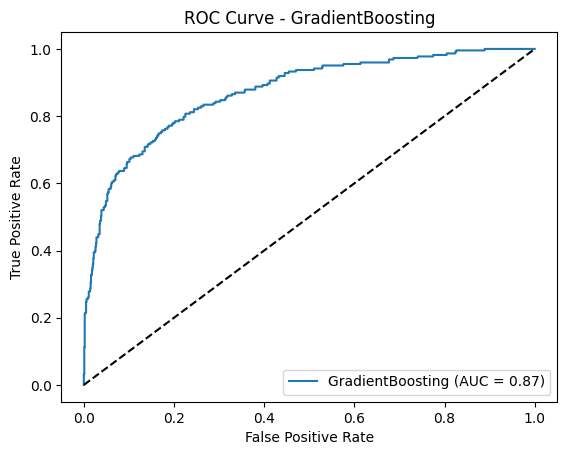


##############################
 Training Xgboost
##############################
--- Xgboost Train Performance ---
Accuracy: 0.9997272231314784
Precision: 0.999727314975542
Recall: 0.9997272231314784
F1 Score: 0.9997271481865009
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       697

    accuracy                           1.00      3666
   macro avg       1.00      1.00      1.00      3666
weighted avg       1.00      1.00      1.00      3666



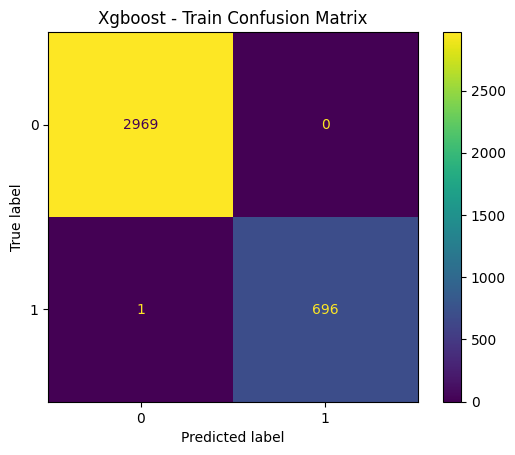

--- Xgboost Test Performance ---
Accuracy: 0.9378068739770867
Precision: 0.9376583800604951
Recall: 0.9378068739770867
F1 Score: 0.9343414943718895
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       999
           1       0.93      0.71      0.81       223

    accuracy                           0.94      1222
   macro avg       0.94      0.85      0.88      1222
weighted avg       0.94      0.94      0.93      1222



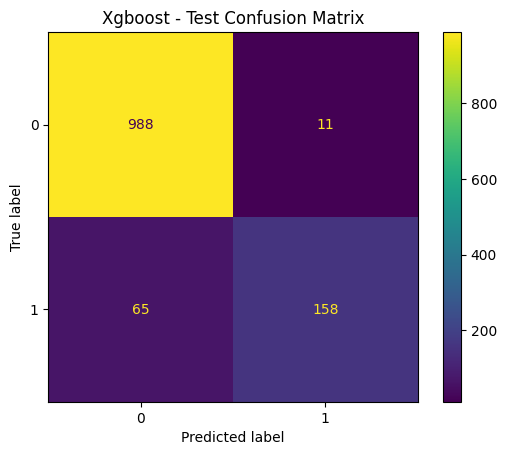

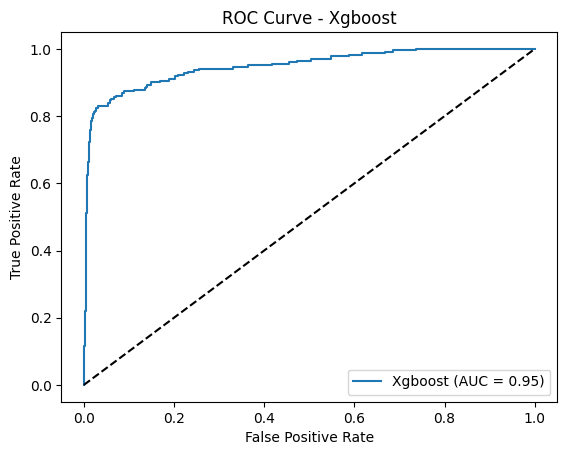

In [261]:
models = {
    "Adaboost":AdaBoostClassifier(),
    "GradientBoosting":GradientBoostingClassifier(),
    "Xgboost":XGBClassifier()
    
}

#  Step 2: Train, predict, and evaluate each model
for name, model in models.items():
    print(f"\n{'#'*30}\n Training {name}\n{'#'*30}")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #  Train metrics
    print(f"--- {name} Train Performance ---")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
    print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
    print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
    plt.title(f"{name} - Train Confusion Matrix")
    plt.show()
    
    #  Test metrics
    print(f"--- {name} Test Performance ---")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    plt.title(f"{name} - Test Confusion Matrix")
    plt.show()
    
    # ROC Curve (for binary classification)
    if len(set(y_test)) == 2:
        y_test_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_test_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()

In [149]:
## hyperparameter tuning 
adaboost_params= {
    "n_estimators" : [50,60,70,80,90],
    "algorithm":['SAMME',"SAMME.R"]
}

gradient_boost_params = {
    "loss":['log_loss','deviance','exponential'],
    "criterion":['friedman_mse','squared_error','mse'],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500],
    "max_depth":[5,8,15,None,10]
}
Xg_boost_params = {
    "learning_rate":[0.1,0.01],
    "max_depth":[5,8,12,20,30],
    "n_estimators":[100,200,300],
    "colsample_bytree":[0.5,0.8,1,0.3,0.4]}

In [151]:
Xg_boost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

In [155]:
adaboost_params

{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

In [157]:
gradient_params

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500],
 'max_depth': [5, 8, 15, None, 10]}

In [163]:
##modellist for hyperparameter tuning 
randomcv_models = [
    ("AB",AdaBoostClassifier(),adaboost_params),
    ("RB",GradientBoostingClassifier(),gradient_params),
    ("XGB",XGBClassifier(),Xg_boost_params)
     ]


In [165]:
randomcv_models

[('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}),
 ('RB',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500],
   'max_depth': [5, 8, 15, None, 10]}),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child

In [167]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

# randomcv_models should look like: [(name, model, param_grid), ...]
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator = model,
        param_distributions = params,   # use params from tuple, not rf_params
        n_iter = 100,
        cv = 3,
        verbose = 2,
        n_jobs = -1
    )
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

# Print results
for model_name in model_param:
    print(model_name)
    print(model_param[model_name])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
AB
{'n_estimators': 60, 'algorithm': 'SAMME'}
RB
{'n_estimators': 500, 'min_samples_split': 15, 'max_depth': 15, 'loss': 'exponential', 'criterion': 'squared_error'}
XGB
{'n_estimators': 300, 'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.8}



##############################
 Training Random Forest
##############################
--- Random Forest Train Performance ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       697

    accuracy                           1.00      3666
   macro avg       1.00      1.00      1.00      3666
weighted avg       1.00      1.00      1.00      3666



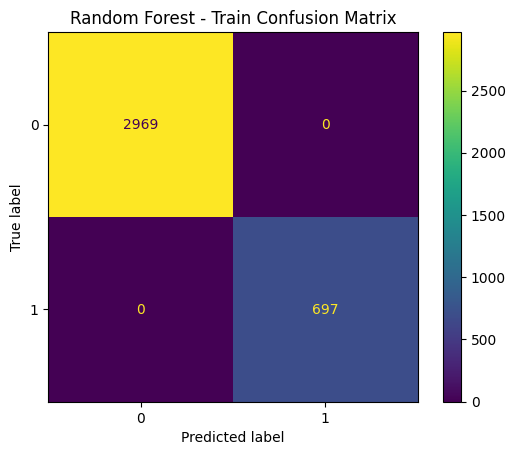

--- Random Forest Test Performance ---
Accuracy: 0.9271685761047463
Precision: 0.928951685504045
Recall: 0.9271685761047463
F1 Score: 0.9211244097012312
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96       999
           1       0.95      0.63      0.76       223

    accuracy                           0.93      1222
   macro avg       0.94      0.81      0.86      1222
weighted avg       0.93      0.93      0.92      1222



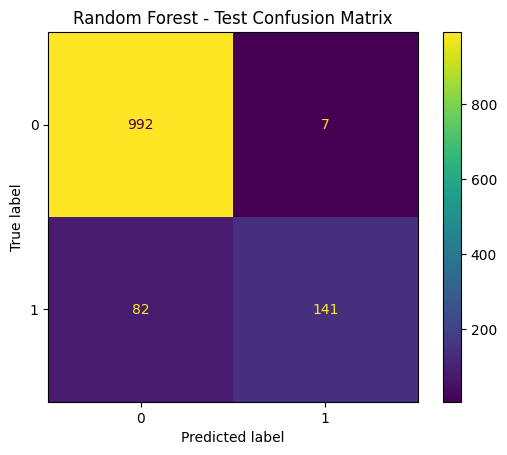

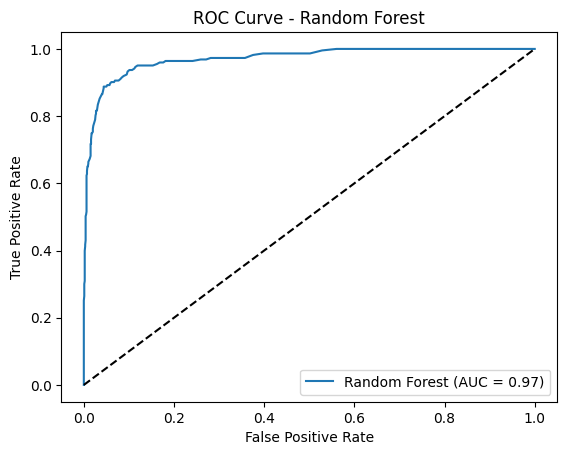


##############################
 Training AdaBoostClassifier
##############################
--- AdaBoostClassifier Train Performance ---
Accuracy: 0.8475177304964538
Precision: 0.8389487436763194
Recall: 0.8475177304964538
F1 Score: 0.8162190798248856
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2969
           1       0.78      0.27      0.41       697

    accuracy                           0.85      3666
   macro avg       0.82      0.63      0.66      3666
weighted avg       0.84      0.85      0.82      3666



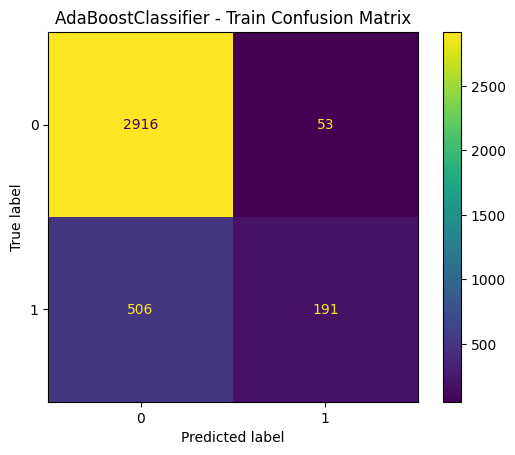

--- AdaBoostClassifier Test Performance ---
Accuracy: 0.8461538461538461
Precision: 0.8295221813844152
Recall: 0.8461538461538461
F1 Score: 0.8159973399064357
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       999
           1       0.71      0.26      0.39       223

    accuracy                           0.85      1222
   macro avg       0.78      0.62      0.65      1222
weighted avg       0.83      0.85      0.82      1222



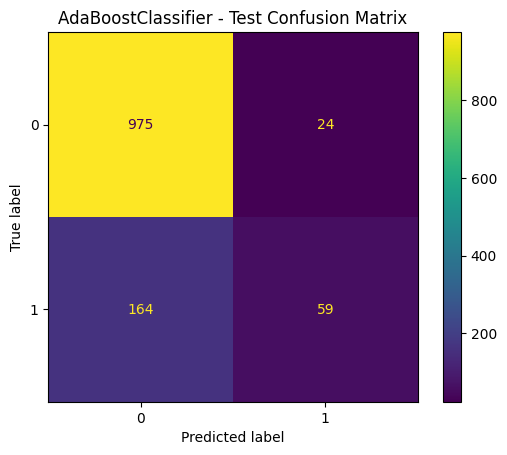

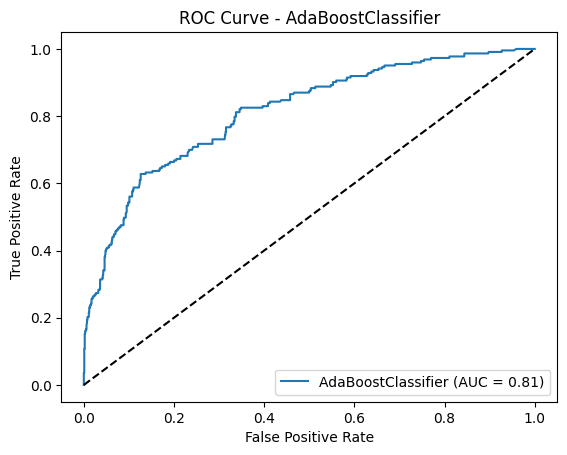


##############################
 Training GradientBoostClassifier
##############################
--- GradientBoostClassifier Train Performance ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       697

    accuracy                           1.00      3666
   macro avg       1.00      1.00      1.00      3666
weighted avg       1.00      1.00      1.00      3666



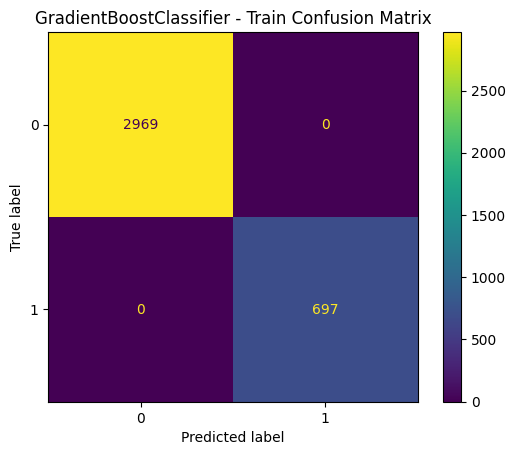

--- GradientBoostClassifier Test Performance ---
Accuracy: 0.9500818330605565
Precision: 0.9498836576680275
Recall: 0.9500818330605565
F1 Score: 0.9480569856856383
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       999
           1       0.95      0.77      0.85       223

    accuracy                           0.95      1222
   macro avg       0.95      0.88      0.91      1222
weighted avg       0.95      0.95      0.95      1222



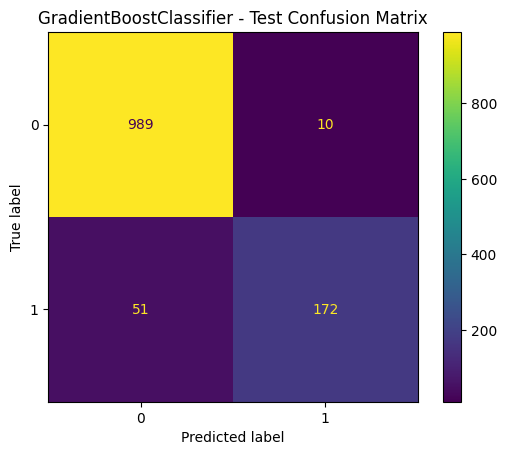

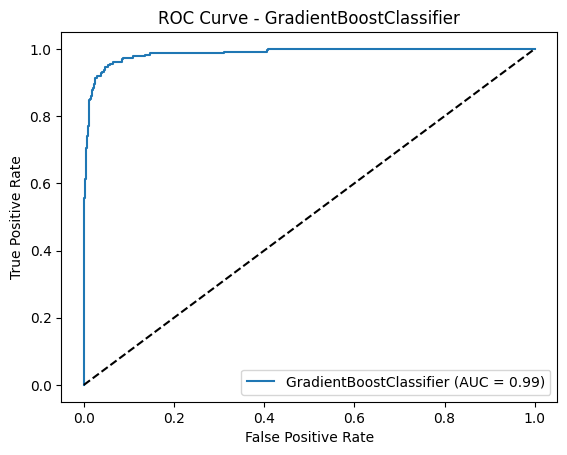


##############################
 Training XGBClassifier
##############################
--- XGBClassifier Train Performance ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2969
           1       1.00      1.00      1.00       697

    accuracy                           1.00      3666
   macro avg       1.00      1.00      1.00      3666
weighted avg       1.00      1.00      1.00      3666



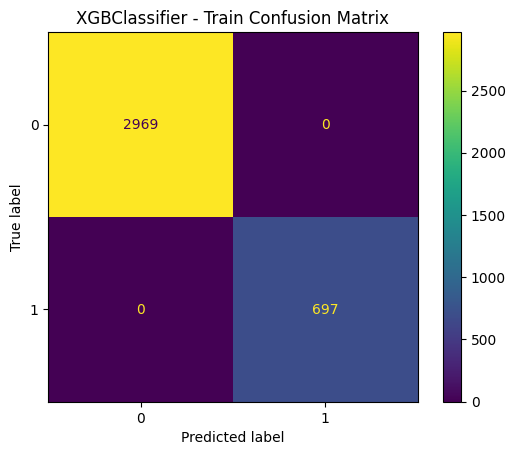

--- XGBClassifier Test Performance ---
Accuracy: 0.9517184942716858
Precision: 0.9516724069710976
Recall: 0.9517184942716858
F1 Score: 0.9497600353352896
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       999
           1       0.95      0.78      0.85       223

    accuracy                           0.95      1222
   macro avg       0.95      0.88      0.91      1222
weighted avg       0.95      0.95      0.95      1222



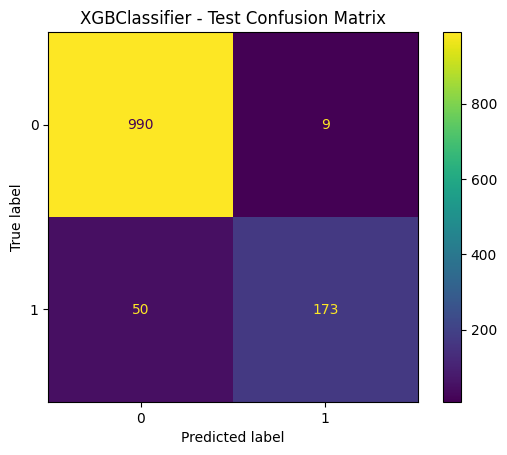

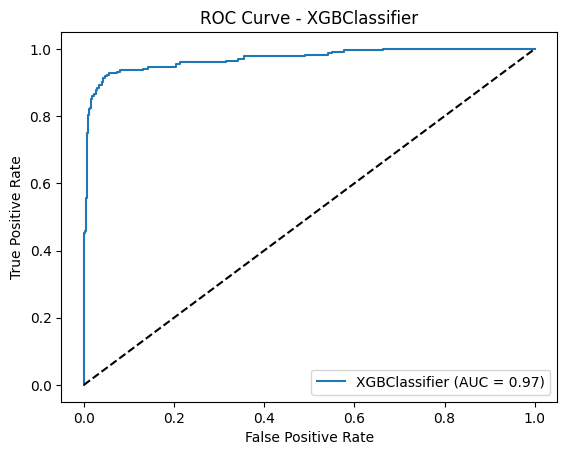

In [145]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators= 200, min_samples_split= 2, max_features=7, max_depth= None),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators= 60, algorithm= 'SAMME'),
    "GradientBoostClassifier": GradientBoostingClassifier(n_estimators = 500, min_samples_split = 8, max_depth = 15, loss = 'exponential', criterion ='squared_error'),
    "XGBClassifier":XGBClassifier(n_estimators= 300, max_depth = 30, learning_rate= 0.1, colsample_bytree= 0.8)

}


#  Step 2: Train, predict, and evaluate each model
for name, model in models.items():
    print(f"\n{'#'*30}\n Training {name}\n{'#'*30}")
    
    # Train
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #  Train metrics
    print(f"--- {name} Train Performance ---")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
    print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
    print("F1 Score:", f1_score(y_train, y_train_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
    plt.title(f"{name} - Train Confusion Matrix")
    plt.show()
    
    #  Test metrics
    print(f"--- {name} Test Performance ---")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    plt.title(f"{name} - Test Confusion Matrix")
    plt.show()
    
    # ROC Curve (for binary classification)
    if len(set(y_test)) == 2:
        y_test_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_test_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()